Since I live in Poland and it's May 2025, the election campaign has just ended and we have just participated in the first round of presidential election. I thought it might be a good material to work on. My objective was to deliver an analysis that hasn't been seen before — something unusual, maybe even odd. 😎

This is how this crazy idea came to my mind:

*"What if we compare the election results from the first round with some absurd statistical data and check if there is a correlation?"*

In [129]:
import pandas as pd
# Reading a CSV file into a pandas dataframe
wybory2025 = pd.read_csv(r'C:\Users\Marcin\Desktop\Varia\Praca\Portfolio\Wybory\Source\wybory_2025.csv', sep=';')
wybory2025.head() # Displaying the first few rows of the dataframe

,kod_teryt,powiat,województwo,frekwencja,głosy_nieważne,głosy_ważne,BARTOSZEWICZ,BIEJAT,BRAUN,HOŁOWNIA,JAKUBIAK,MACIAK,MENTZEN,NAWROCKI,SENYSZYN,STANOWSKI,TRZASKOWSKI,WOCH,ZANDBERG
0,20100.0,bolesławiecki,dolnośląskie,0.619788,0.005333,0.994667,0.004083,0.033721,0.068623,0.041616,0.005682,0.002214,0.164793,0.284945,0.009199,0.011117,0.335563,0.001033,0.037411
1,20200.0,dzierżoniowski,dolnośląskie,0.602040,0.005748,0.994252,0.005113,0.036390,0.063798,0.039822,0.005873,0.001612,0.139666,0.298494,0.008913,0.011124,0.353125,0.000668,0.035400
2,20300.0,głogowski,dolnośląskie,0.646178,0.004148,0.995852,0.004409,0.038051,0.054568,0.046870,0.006724,0.001876,0.142923,0.305627,0.008575,0.011084,0.336005,0.000804,0.042485
3,20400.0,górowski,dolnośląskie,0.565648,0.006049,0.993951,0.004104,0.041681,0.074942,0.039205,0.007997,0.002406,0.172316,0.323544,0.009270,0.009412,0.275989,0.000849,0.038285
4,20500.0,jaworski,dolnośląskie,0.599712,0.005341,0.994659,0.004732,0.036813,0.070714,0.041500,0.006052,0.001957,0.147707,0.330633,0.008373,0.010102,0.303877,0.001183,0.036358


In [130]:
wybory2025.info() # Inspecting the dataframe structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kod_teryt       380 non-null    float64
 1   powiat          382 non-null    object 
 2   województwo     380 non-null    object 
 3   frekwencja      382 non-null    float64
 4   głosy_nieważne  382 non-null    float64
 5   głosy_ważne     382 non-null    float64
 6   BARTOSZEWICZ    382 non-null    float64
 7   BIEJAT          382 non-null    float64
 8   BRAUN           382 non-null    float64
 9   HOŁOWNIA        382 non-null    float64
 10  JAKUBIAK        382 non-null    float64
 11  MACIAK          382 non-null    float64
 12  MENTZEN         382 non-null    float64
 13  NAWROCKI        382 non-null    float64
 14  SENYSZYN        382 non-null    float64
 15  STANOWSKI       382 non-null    float64
 16  TRZASKOWSKI     382 non-null    float64
 17  WOCH            382 non-null    flo

In [131]:
# Renaming columns to include the year 2025
wybory2025.columns = [
    col if col == 'kod_teryt' else f"{col}_2025"
    for col in wybory2025.columns
]

In [132]:
# Loading another CSV file (election results from 2020) into a second pandas dataframe
wybory2020 = pd.read_csv(r'C:\Users\Marcin\Desktop\Varia\Praca\Portfolio\Wybory\Source\wybory_2020.csv', sep=';')
wybory2020.head() # Displaying the first few rows of the second dataframe

,kod_teryt,powiat,województwo,frekwencja,głosy_nieważne,głosy_ważne,BIEDROŃ,BOSAK,DUDA,HOŁOWNIA,JAKUBIAK,KOSINIAK-KAMYSZ,PIOTROWSKI,TANAJNO,TRZASKOWSKI,WITKOWSKI,ŻÓŁTEK,liczba_obwodów
0,20100,bolesławiecki,dolnośląskie,0.6009,0.0039,0.9961,0.0208,0.0672,0.4156,0.1639,0.0013,0.0154,0.0007,0.0012,0.3103,0.0013,0.0024,63
1,20200,dzierżoniowski,dolnośląskie,0.5895,0.0034,0.9966,0.0216,0.0609,0.4403,0.1367,0.0012,0.0148,0.0010,0.0018,0.3187,0.0010,0.0019,83
2,20300,głogowski,dolnośląskie,0.6257,0.0029,0.9971,0.0233,0.0595,0.4419,0.1421,0.0010,0.0175,0.0010,0.0014,0.3094,0.0010,0.0020,53
3,20400,górowski,dolnośląskie,0.5405,0.0027,0.9973,0.0200,0.0620,0.5004,0.1314,0.0014,0.0259,0.0008,0.0010,0.2549,0.0007,0.0015,23
4,20500,jaworski,dolnośląskie,0.5895,0.0039,0.9961,0.0205,0.0655,0.4778,0.1118,0.0012,0.0308,0.0012,0.0009,0.2877,0.0006,0.0019,39


In [133]:
wybory2020.info() # Inspecting the structure and data types of the second dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kod_teryt        382 non-null    int64  
 1   powiat           382 non-null    object 
 2   województwo      382 non-null    object 
 3   frekwencja       382 non-null    float64
 4   głosy_nieważne   382 non-null    float64
 5   głosy_ważne      382 non-null    float64
 6   BIEDROŃ          382 non-null    float64
 7   BOSAK            382 non-null    float64
 8   DUDA             382 non-null    float64
 9   HOŁOWNIA         382 non-null    float64
 10  JAKUBIAK         382 non-null    float64
 11  KOSINIAK-KAMYSZ  382 non-null    float64
 12  PIOTROWSKI       382 non-null    float64
 13  TANAJNO          382 non-null    float64
 14  TRZASKOWSKI      382 non-null    float64
 15  WITKOWSKI        382 non-null    float64
 16  ŻÓŁTEK           382 non-null    float64
 17  liczba_obwodów  

In [134]:
# Renaming columns to include the year 2020
wybory2020.columns = [
    col if col == 'kod_teryt' else f"{col}_2020"
    for col in wybory2020.columns
]

In [135]:
wybory2020.head()

,kod_teryt,powiat_2020,województwo_2020,frekwencja_2020,głosy_nieważne_2020,głosy_ważne_2020,BIEDROŃ_2020,BOSAK_2020,DUDA_2020,HOŁOWNIA_2020,JAKUBIAK_2020,KOSINIAK-KAMYSZ_2020,PIOTROWSKI_2020,TANAJNO_2020,TRZASKOWSKI_2020,WITKOWSKI_2020,ŻÓŁTEK_2020,liczba_obwodów_2020
0,20100,bolesławiecki,dolnośląskie,0.6009,0.0039,0.9961,0.0208,0.0672,0.4156,0.1639,0.0013,0.0154,0.0007,0.0012,0.3103,0.0013,0.0024,63
1,20200,dzierżoniowski,dolnośląskie,0.5895,0.0034,0.9966,0.0216,0.0609,0.4403,0.1367,0.0012,0.0148,0.0010,0.0018,0.3187,0.0010,0.0019,83
2,20300,głogowski,dolnośląskie,0.6257,0.0029,0.9971,0.0233,0.0595,0.4419,0.1421,0.0010,0.0175,0.0010,0.0014,0.3094,0.0010,0.0020,53
3,20400,górowski,dolnośląskie,0.5405,0.0027,0.9973,0.0200,0.0620,0.5004,0.1314,0.0014,0.0259,0.0008,0.0010,0.2549,0.0007,0.0015,23
4,20500,jaworski,dolnośląskie,0.5895,0.0039,0.9961,0.0205,0.0655,0.4778,0.1118,0.0012,0.0308,0.0012,0.0009,0.2877,0.0006,0.0019,39


In [136]:
# Merging the two dataframes on the 'kod_teryt' column
dfmerged = pd.merge(wybory2025, wybory2020, on=['kod_teryt'], how='left')

In [137]:
dfmerged.head() # Displaying the first few rows of the merged dataframe

,kod_teryt,powiat_2025,województwo_2025,frekwencja_2025,głosy_nieważne_2025,głosy_ważne_2025,BARTOSZEWICZ_2025,BIEJAT_2025,BRAUN_2025,HOŁOWNIA_2025,...,DUDA_2020,HOŁOWNIA_2020,JAKUBIAK_2020,KOSINIAK-KAMYSZ_2020,PIOTROWSKI_2020,TANAJNO_2020,TRZASKOWSKI_2020,WITKOWSKI_2020,ŻÓŁTEK_2020,liczba_obwodów_2020
0,20100.0,bolesławiecki,dolnośląskie,0.619788,0.005333,0.994667,0.004083,0.033721,0.068623,0.041616,...,0.4156,0.1639,0.0013,0.0154,0.0007,0.0012,0.3103,0.0013,0.0024,63.0
1,20200.0,dzierżoniowski,dolnośląskie,0.602040,0.005748,0.994252,0.005113,0.036390,0.063798,0.039822,...,0.4403,0.1367,0.0012,0.0148,0.0010,0.0018,0.3187,0.0010,0.0019,83.0
2,20300.0,głogowski,dolnośląskie,0.646178,0.004148,0.995852,0.004409,0.038051,0.054568,0.046870,...,0.4419,0.1421,0.0010,0.0175,0.0010,0.0014,0.3094,0.0010,0.0020,53.0
3,20400.0,górowski,dolnośląskie,0.565648,0.006049,0.993951,0.004104,0.041681,0.074942,0.039205,...,0.5004,0.1314,0.0014,0.0259,0.0008,0.0010,0.2549,0.0007,0.0015,23.0
4,20500.0,jaworski,dolnośląskie,0.599712,0.005341,0.994659,0.004732,0.036813,0.070714,0.041500,...,0.4778,0.1118,0.0012,0.0308,0.0012,0.0009,0.2877,0.0006,0.0019,39.0


In [138]:
dfmerged['kod_teryt'] = dfmerged['kod_teryt'].astype(str).str.replace('.', '', regex=False)
dfmerged['kod_teryt'] = pd.to_numeric(dfmerged['kod_teryt'], errors='coerce').astype('Int64')
dfmerged.head()  # Displaying the first few rows after modifications

,kod_teryt,powiat_2025,województwo_2025,frekwencja_2025,głosy_nieważne_2025,głosy_ważne_2025,BARTOSZEWICZ_2025,BIEJAT_2025,BRAUN_2025,HOŁOWNIA_2025,...,DUDA_2020,HOŁOWNIA_2020,JAKUBIAK_2020,KOSINIAK-KAMYSZ_2020,PIOTROWSKI_2020,TANAJNO_2020,TRZASKOWSKI_2020,WITKOWSKI_2020,ŻÓŁTEK_2020,liczba_obwodów_2020
0,201000,bolesławiecki,dolnośląskie,0.619788,0.005333,0.994667,0.004083,0.033721,0.068623,0.041616,...,0.4156,0.1639,0.0013,0.0154,0.0007,0.0012,0.3103,0.0013,0.0024,63.0
1,202000,dzierżoniowski,dolnośląskie,0.602040,0.005748,0.994252,0.005113,0.036390,0.063798,0.039822,...,0.4403,0.1367,0.0012,0.0148,0.0010,0.0018,0.3187,0.0010,0.0019,83.0
2,203000,głogowski,dolnośląskie,0.646178,0.004148,0.995852,0.004409,0.038051,0.054568,0.046870,...,0.4419,0.1421,0.0010,0.0175,0.0010,0.0014,0.3094,0.0010,0.0020,53.0
3,204000,górowski,dolnośląskie,0.565648,0.006049,0.993951,0.004104,0.041681,0.074942,0.039205,...,0.5004,0.1314,0.0014,0.0259,0.0008,0.0010,0.2549,0.0007,0.0015,23.0
4,205000,jaworski,dolnośląskie,0.599712,0.005341,0.994659,0.004732,0.036813,0.070714,0.041500,...,0.4778,0.1118,0.0012,0.0308,0.0012,0.0009,0.2877,0.0006,0.0019,39.0


In [139]:
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   kod_teryt             380 non-null    Int64  
 1   powiat_2025           382 non-null    object 
 2   województwo_2025      380 non-null    object 
 3   frekwencja_2025       382 non-null    float64
 4   głosy_nieważne_2025   382 non-null    float64
 5   głosy_ważne_2025      382 non-null    float64
 6   BARTOSZEWICZ_2025     382 non-null    float64
 7   BIEJAT_2025           382 non-null    float64
 8   BRAUN_2025            382 non-null    float64
 9   HOŁOWNIA_2025         382 non-null    float64
 10  JAKUBIAK_2025         382 non-null    float64
 11  MACIAK_2025           382 non-null    float64
 12  MENTZEN_2025          382 non-null    float64
 13  NAWROCKI_2025         382 non-null    float64
 14  SENYSZYN_2025         382 non-null    float64
 15  STANOWSKI_2025        3

In [140]:
# accessing additional datasets for data on libraries, cultural centers, and trash bins
kosze = pd.read_csv(r'C:\Users\Marcin\Desktop\Varia\Praca\Portfolio\Wybory\Source\kosze.csv', sep=';')
biblioteki = pd.read_csv(r'C:\Users\Marcin\Desktop\Varia\Praca\Portfolio\Wybory\Source\biblioteki.csv', sep=';')
kultura = pd.read_csv(r'C:\Users\Marcin\Desktop\Varia\Praca\Portfolio\Wybory\Source\kultura.csv', sep=';')

# merging the additional datasets with the main dataframe
dfmerged = dfmerged.merge(kosze, left_on='kod_teryt', right_on=['kod'], how='left')
dfmerged = dfmerged.merge(biblioteki, left_on='kod_teryt', right_on=['kod'], how='left')
dfmerged = dfmerged.merge(kultura, left_on='kod_teryt', right_on=['kod'], how='left')

# Cleaning up the merged dataframe by converting specific columns to numeric types
dfmerged['liczba_koszy_na_100_mieszkancow'] = dfmerged['liczba_koszy_na_100_mieszkancow'].astype(str).str.replace(',', '.').astype(float)
dfmerged['biblioteki_1000_ludnosci'] = dfmerged['biblioteki_1000_ludnosci'].astype(str).str.replace(',', '.').astype(float)
dfmerged['wypozyczenia_na_czytelnika'] = dfmerged['wypozyczenia_na_czytelnika'].astype(str).str.replace(',', '.').astype(float)
dfmerged['udzial_osob_zaangazowanych_pow_60_roku'] = dfmerged['udzial_osob_zaangazowanych_pow_60_roku'].astype(str).str.replace(',', '.').astype(float)
dfmerged['czlonkowie_grup_artystycznych_na_1000_ludnosci'] = dfmerged['czlonkowie_grup_artystycznych_na_1000_ludnosci'].astype(str).str.replace(',', '.').astype(float)

# Comparing the votes for Trzaskowski and Hołownia in 2020 and 2025 (the two candidates that started both in 2020 and in 2025) and the difference between Nawrocki and Duda
dfmerged['TRZASKOWSKI_DIFF'] = dfmerged['TRZASKOWSKI_2025'] - dfmerged['TRZASKOWSKI_2020']
dfmerged['HOŁOWNIA_DIFF'] = dfmerged['HOŁOWNIA_2025'] - dfmerged['HOŁOWNIA_2020']
dfmerged['NAWROCKI_VS_DUDA_DIFF'] = dfmerged['NAWROCKI_2025'] - dfmerged['DUDA_2020']
dfmerged.info() # Displaying the structure and data types of the final merged dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 54 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   kod_teryt                                       380 non-null    Int64  
 1   powiat_2025                                     382 non-null    object 
 2   województwo_2025                                380 non-null    object 
 3   frekwencja_2025                                 382 non-null    float64
 4   głosy_nieważne_2025                             382 non-null    float64
 5   głosy_ważne_2025                                382 non-null    float64
 6   BARTOSZEWICZ_2025                               382 non-null    float64
 7   BIEJAT_2025                                     382 non-null    float64
 8   BRAUN_2025                                      382 non-null    float64
 9   HOŁOWNIA_2025                              

Now that I have prepared and cleaned my data I can start analysing it.

The first question to answer is: How strong is the correlation between the results of two candidates from one of the biggest Polish parties — PiS? To find it out I must plot the results of DUDA from 2020 and NAWROCKI from 2025.

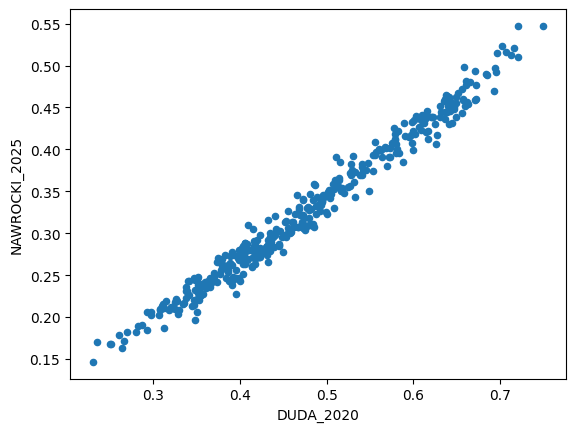

Correlation coefficient: 0.9894


In [141]:
import matplotlib.pyplot as plt
x_axis = 'DUDA_2020'
y_axis = 'NAWROCKI_2025'

dfmerged.plot(kind='scatter', x=x_axis, y=y_axis)
# plt.xlabel('Liczba bibliotek na 1000 ludności')
# plt.ylabel('Głosy na Trzaskowskiego 2020')
# plt.title('Korelacja: liczba bibliotek vs głosy na Trzaskowskiego (2020)')
plt.show()

correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation:.4f}")

As you can see, the correlation is very strong.

But which correlation is stronger: DUDA_2020-NAWROCKI_2025 or TRZASKOWSKI_2020-TRZASKOWSKI_2025?

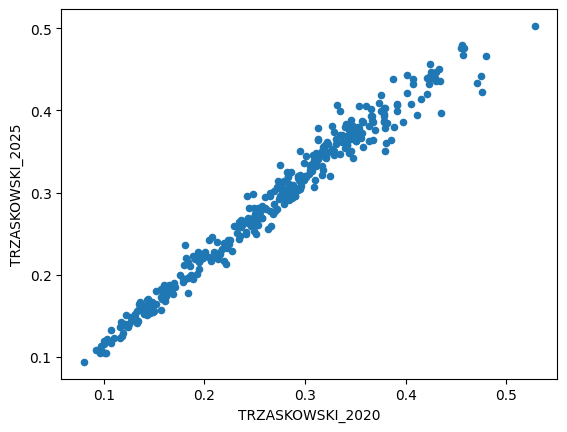

Correlation coefficient: 0.9868


In [142]:
x_axis = 'TRZASKOWSKI_2020'
y_axis = 'TRZASKOWSKI_2025'

dfmerged.plot(kind='scatter', x=x_axis, y=y_axis)
plt.show()

correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation:.4f}")

Wow! 0.9868 means a very strong correlation as well.

It seems to really confirm the hypothesis that people tend to vote for the party, not just for the candidate. We have seen that the correlation between the number of votes for two candidates from the same party is as strong (or even slightly stronger) than between the results of the same candidate over the last 5 years.

Let's now investigate the top 5 and bottom 5 counties (powiats) where NAWROCKI performed better/worse than DUDA and where TRZASKOWSKI performed better/worse than 5 years ago.

In [143]:
nawrocki_top10_diff = dfmerged.nlargest(5, 'NAWROCKI_VS_DUDA_DIFF')[[
    'powiat_2025', 'TRZASKOWSKI_2020', 'TRZASKOWSKI_2025', 'TRZASKOWSKI_DIFF',
    'DUDA_2020', 'NAWROCKI_2025', 'NAWROCKI_VS_DUDA_DIFF'
]].round(2)

nawrocki_bottom10_diff = dfmerged.nsmallest(5, 'NAWROCKI_VS_DUDA_DIFF')[[
    'powiat_2025', 'TRZASKOWSKI_2020', 'TRZASKOWSKI_2025', 'TRZASKOWSKI_DIFF',
    'DUDA_2020', 'NAWROCKI_2025', 'NAWROCKI_VS_DUDA_DIFF'
]].round(2)

trzaskowski_top10_diff = dfmerged.nlargest(5, 'TRZASKOWSKI_DIFF')[[
    'powiat_2025', 'TRZASKOWSKI_2020', 'TRZASKOWSKI_2025', 'TRZASKOWSKI_DIFF',
    'DUDA_2020', 'NAWROCKI_2025', 'NAWROCKI_VS_DUDA_DIFF'
]].round(2)

trzaskowski_bottom10_diff = dfmerged.nsmallest(5, 'TRZASKOWSKI_DIFF')[[
    'powiat_2025', 'TRZASKOWSKI_2020', 'TRZASKOWSKI_2025', 'TRZASKOWSKI_DIFF',
    'DUDA_2020', 'NAWROCKI_2025', 'NAWROCKI_VS_DUDA_DIFF'
]].round(2)

In [144]:
nawrocki_top10_diff

,powiat_2025,TRZASKOWSKI_2020,TRZASKOWSKI_2025,TRZASKOWSKI_DIFF,DUDA_2020,NAWROCKI_2025,NAWROCKI_VS_DUDA_DIFF
254,Sopot,0.53,0.50,-0.03,0.23,0.17,-0.06
90,Zielona Góra,0.46,0.48,0.02,0.26,0.18,-0.08
252,Gdynia,0.48,0.47,-0.01,0.25,0.17,-0.08
251,Gdańsk,0.47,0.43,-0.04,0.25,0.17,-0.08
360,Poznań,0.47,0.44,-0.03,0.23,0.15,-0.08


In [145]:
nawrocki_bottom10_diff

,powiat_2025,TRZASKOWSKI_2020,TRZASKOWSKI_2025,TRZASKOWSKI_DIFF,DUDA_2020,NAWROCKI_2025,NAWROCKI_VS_DUDA_DIFF
162,siedlecki,0.10,0.10,0.00,0.69,0.47,-0.22
55,chełmski,0.14,0.15,0.01,0.63,0.41,-0.22
128,proszowicki,0.13,0.16,0.02,0.64,0.43,-0.21
151,ostrołęcki,0.12,0.14,0.02,0.66,0.44,-0.21
206,przeworski,0.12,0.14,0.02,0.67,0.46,-0.21


In [146]:
trzaskowski_top10_diff

,powiat_2025,TRZASKOWSKI_2020,TRZASKOWSKI_2025,TRZASKOWSKI_DIFF,DUDA_2020,NAWROCKI_2025,NAWROCKI_VS_DUDA_DIFF
78,krośnieński,0.33,0.41,0.07,0.34,0.24,-0.10
185,krapkowicki,0.31,0.38,0.07,0.35,0.20,-0.15
87,żarski,0.34,0.40,0.06,0.35,0.24,-0.11
222,hajnowski,0.28,0.33,0.06,0.31,0.19,-0.12
191,strzelecki,0.30,0.35,0.06,0.40,0.23,-0.17


In [147]:
trzaskowski_bottom10_diff

,powiat_2025,TRZASKOWSKI_2020,TRZASKOWSKI_2025,TRZASKOWSKI_DIFF,DUDA_2020,NAWROCKI_2025,NAWROCKI_VS_DUDA_DIFF
178,Warszawa,0.48,0.42,-0.05,0.27,0.18,-0.09
28,Wrocław,0.44,0.40,-0.04,0.28,0.18,-0.10
251,Gdańsk,0.47,0.43,-0.04,0.25,0.17,-0.08
360,Poznań,0.47,0.44,-0.03,0.23,0.15,-0.08
134,Kraków,0.38,0.35,-0.03,0.32,0.21,-0.11


This leads to interesting conclusions:

- **In all counties Nawrocki actually performed worse than Duda.** This seems to make sense as in this year's election two other right-wing candidates (BRAUN and MENTZEN) achieved much better results than their colleague BOSAK in 2020. The voters could have switched from one right-wing party to another.

- **Nawrocki had the best voters retention in Tricity (Trójmiasto: Gdańsk, Gdynia, Sopot).** This is quite surprising. Rafał TRZASKOWSKI used excatly the opposite claim as an argument against Karol NAWROCKI. Referring to a recent appartment scandal related to NAWROCKI, TRZASKOWSKI said that "people were moved by this event, especially in Tricity, what can be seen by looking at the results". Well, the data proves that it actually isn't true!

- **Trzaskowski lost the most voters in the biggest cities including Warsaw.** This one is also surprising. TRZASKOWSKI, being the mayor of Warsaw, was expected to perform very well there as well as in other big cities where he is seen as the strongest opposition to NAWROCKI. One possible explanation of this fact is stronger differentiation amongst the voters which allowed the candidates other than the top 2 to gather significantly more votes. This way they might have "stolen" these votes from TRZASKOWSKI as we have just seen it happen to NAWROCKI.

Let us now move to a bit more specific comparisons and see if the voters' behaviour is somehow related to the number of readers in the public libraries.

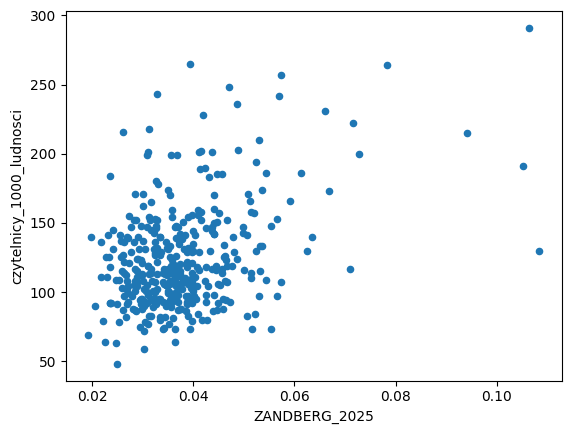

Correlation coefficient: 0.4002


In [148]:
x_axis = 'ZANDBERG_2025'
y_axis = 'czytelnicy_1000_ludnosci'

dfmerged.plot(kind='scatter', x=x_axis, y=y_axis)
plt.show()

correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation:.4f}")

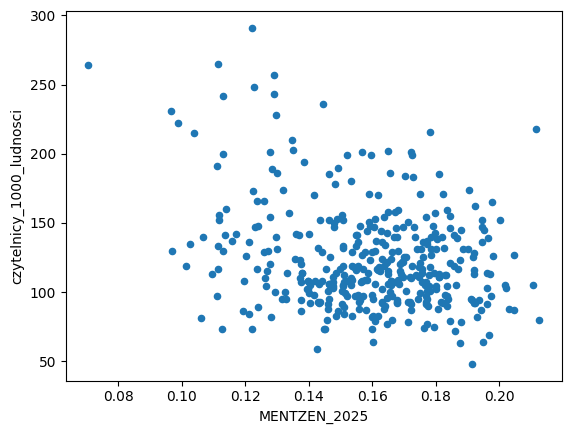

Correlation coefficient: -0.2754


In [149]:
x_axis = 'MENTZEN_2025'
y_axis = 'czytelnicy_1000_ludnosci'

dfmerged.plot(kind='scatter', x=x_axis, y=y_axis)
plt.show()

correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation:.4f}")

It is also worth mentioning that in case of other candidates the correlation was smaller, nevertheless there was a tendency there too: all right-wing candidates had a negative correlation wheras the centre and left-wing — a positive one.

These findings don't prove anything yet but surely can't be ignored too.

Let's check the frequence as well:

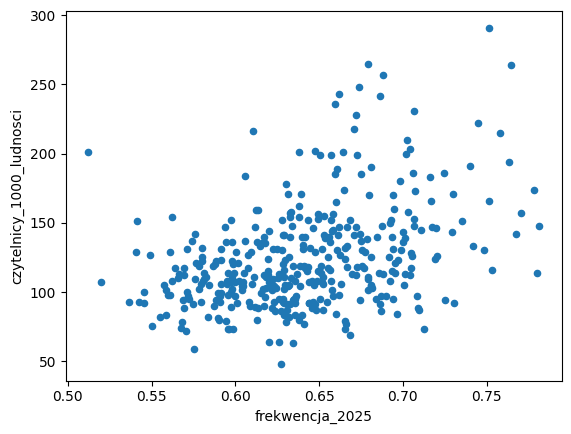

Correlation coefficient: 0.3970


In [150]:
x_axis = 'frekwencja_2025'
y_axis = 'czytelnicy_1000_ludnosci'

dfmerged.plot(kind='scatter', x=x_axis, y=y_axis)
plt.show()

correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation:.4f}")

In the next step I check the relationship between the number of votes for a specific candidate and the activities of culture centres.

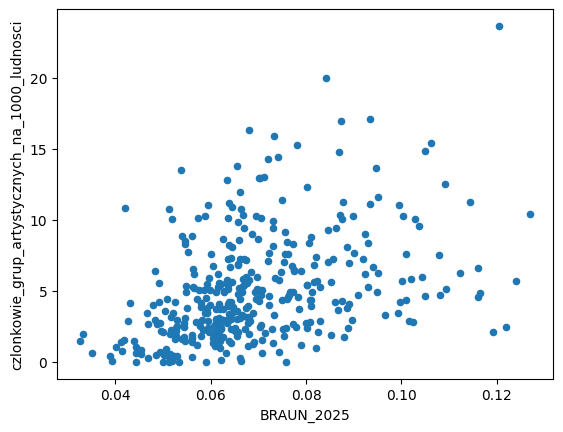

Correlation coefficient: 0.4058


In [151]:
x_axis = 'BRAUN_2025'
y_axis = 'czlonkowie_grup_artystycznych_na_1000_ludnosci'

dfmerged.plot(kind='scatter', x=x_axis, y=y_axis)
plt.show()

correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation:.4f}")

In [152]:
y_axis = 'czlonkowie_grup_artystycznych_na_1000_ludnosci'

print(f"Correlation with the number of artistic group members per 1000 inhabitants:")

x_axis = 'BRAUN_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'MENTZEN_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'NAWROCKI_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'TRZASKOWSKI_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'HOŁOWNIA_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'BIEJAT_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'ZANDBERG_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

Correlation with the number of artistic group members per 1000 inhabitants:
 BRAUN_2025: 0.4058
 MENTZEN_2025: 0.3295
 NAWROCKI_2025: 0.3037
 TRZASKOWSKI_2025: -0.3414
 HOŁOWNIA_2025: -0.1969
 BIEJAT_2025: -0.3629
 ZANDBERG_2025: -0.2993


The correlation turned out to be pretty small once again but there is also an interesting pattern hidden out there: all candidates from the right-wing have a positive correlation with the number of number of artistic group members per 1000 inhabitants: the more artistic group members, the more votes for BRAUN, MENTZEN or NAWROCKI in a given county. On the other hand, in case of all candidates from the opposite side a negative relationship can be seen.

Let's see if there is any correlation between the number of trash bins per 100 inhabitants and the votes for the specific candidates.

In [153]:
y_axis = 'liczba_koszy_na_100_mieszkancow'

print(f"Correlation with the number of trash bins per 100 inhabitants:")

x_axis = 'BRAUN_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'MENTZEN_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'NAWROCKI_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'TRZASKOWSKI_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'HOŁOWNIA_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'BIEJAT_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

x_axis = 'ZANDBERG_2025'
correlation = dfmerged[[x_axis, y_axis]].corr().iloc[0, 1]
print(f" {x_axis}: {correlation:.4f}")

Correlation with the number of trash bins per 100 inhabitants:
 BRAUN_2025: -0.1200
 MENTZEN_2025: -0.1674
 NAWROCKI_2025: -0.1385
 TRZASKOWSKI_2025: 0.1875
 HOŁOWNIA_2025: 0.0202
 BIEJAT_2025: 0.1099
 ZANDBERG_2025: -0.0114


Well, there is actually no correlation... 😅